# Mitali Nitin Patil
Title: Color Identification in Images
Task: Implement an image color detector which identifies all the colors in an image or video.

## Importing required libraries



In [9]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd



## Reading and Plotting the image

In [10]:

img = mpimg.imread(r'C:\Users\Mitali Patil\Downloads\Color detection\Color detection\colorpic.jpg')
print(img)

[[[ 20  35 118]
  [ 19  34 117]
  [ 20  32 116]
  ...
  [ 22  71  50]
  [ 22  71  50]
  [ 20  72  50]]

 [[ 18  35 117]
  [ 19  34 117]
  [ 19  34 117]
  ...
  [ 19  79  53]
  [ 20  80  54]
  [ 21  81  56]]

 [[ 20  37 119]
  [ 20  37 119]
  [ 20  35 116]
  ...
  [  9  82  52]
  [ 10  81  51]
  [  9  80  50]]

 ...

 [[122 123 118]
  [123 124 119]
  [124 125 120]
  ...
  [ 33  32  38]
  [ 31  30  38]
  [ 29  28  36]]

 [[123 124 119]
  [123 124 119]
  [124 125 120]
  ...
  [ 35  34  40]
  [ 33  32  40]
  [ 32  31  39]]

 [[123 124 119]
  [123 124 119]
  [124 125 120]
  ...
  [ 36  35  41]
  [ 35  34  40]
  [ 34  33  41]]]


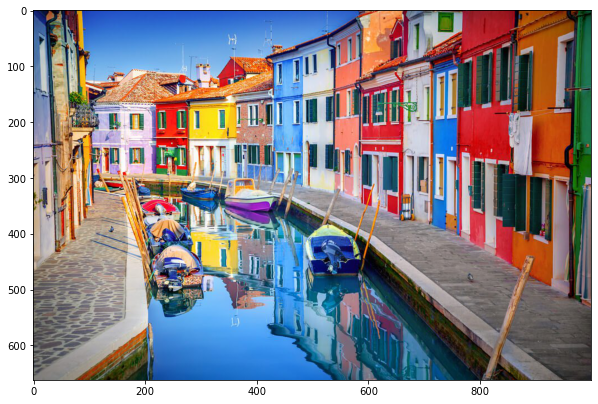

In [11]:
plt.figure(figsize=(10,15))
plt.imshow(img)

In [12]:
clicked = False
r = g = b = x_pos = y_pos = 0

## Reading the csv file

In [13]:

index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv(r'C:\Users\Mitali Patil\Downloads\TSF-TASK-5-main\TSF-TASK-5-main\colors.csv', names=index, header=None)

## Function to print the color name

In [14]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

## Function to calculate the x,y cordinates 

In [15]:
def draw_function(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

In [ ]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)
while True:
    cv2.imshow("image", img)
    if clicked:
        cv2.rectangle(img, (10, 10), (700, 60), (b, g, r), -1)
        text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
        cv2.putText(img, text, (10, 10), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
        if r + g + b >= 600:
            cv2.putText(img, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        clicked = False
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()